# LAB 2: Evaluation of different LLM-Based ChatBots for the resolution of problems related to Data Science problems resolutions in Python/Pandas

## 1. SELECTED PROMPTING STRUCTURES

>Figure 1: Schematic of the different structures for prompting a chatbot

Three of the structures in the diagram above will be selected. The focus will be put on the most – so to say – elaborated ways to prompt a language model. In other words, the following ones will be chosen.

**Prompt → Code:**

</br>
<b style="padding:5px; border-color:lightgreen; border:solid 2px lightgreen">
Prompt(data, context and tasks)
</b> -> <b style="padding:5px; border-color:lightgreen; border:solid 2px purple">
Code
</b> -> <b style="padding:5px; border-color:lightgreen; border:solid 2px dodgerblue">
Additional prompt
</b> <-> <b style="padding:5px; border-color:lightgreen; border:solid 2px purple">
Code
</b> -> <b style="padding:5px; border-color:lightgreen; border:solid 2px red">
End
</b> ->
</br>

This prompting structure is the simplest and consists in prompting all the data and tasks at once (specifying the dataset for the problem, the tasks, and a structure for the result, for example) and expects code solving the problem, along with elaboration about the solving process.
Additional questions are suitable after the first response, and those will be tested too.

**Prompt(schema) → Code → Prompt(data) → Report**

</br>
<b style="padding:5px; border-color:lightgreen; border:solid 2px lightgreen">
Prompt(schema)
</b> -> <dummy style="padding:5px; border-color:lightgreen; border:solid 2px purple">
Understanding the problem and providing generic results
</dummy> -> <b style="padding:5px; border-color:lightgreen; border:solid 2px lightgreen">
Tasks
</b> <-> <dummy style="padding:5px; border-color:lightgreen; border:solid 2px purple">
Code tweaking and details about the expected results
</dummy> -> <b style="padding:5px; border-color:lightgreen; border:solid 2px red">
End
</b> ->
</br>

Where:
- Prompt(schema) will be basically the same as “Prompt(tasks)”; in this case the tasks will be specified before the context.
- Code, ideally, will be a more generic solution to the specified task
- Prompt(data) will contain the context (mainly a summary of the structure of the data for the problem) and that a visualization and explanation of the result is desired
- The report will contain a summary of the expected results and necessary tweaks for the code

**Prompt(schema) → Prompt(tasks) → Code:**

</br>
<b style="padding:5px; border-color:lightgreen; border:solid 2px lightgreen">
Prompt(schema)
</b> -> <dummy style="padding:5px; border-color:lightgreen; border:solid 2px purple">
Understanding confirmation by the LLMs side
</dummy> -> <b style="padding:5px; border-color:lightgreen; border:solid 2px lightgreen">
PROMPT (data)
</b> <-> <dummy style="padding:5px; border-color:lightgreen; border:solid 2px purple">
Code solving the tasks with the schema as context
</dummy> -> <b style="padding:5px; border-color:lightgreen; border:solid 2px red">
End
</b> ->
</br>

Where:
- Prompt(schema) will be the initial prompt, with information that will help to introduce the chatbot to the context of the problem. It will include things like the dataset for the problem, context about the information it contains, and context about the finality of the problem.
- Prompt(tasks) will be more specific tasks the model will have to solve, and where there can be a sequence of several tasks.
- Code will be the response of the LLM, the solution to each problem.



## 2. QUESTIONS

### Question 1: Schema -> Tasks -> Code

#### Details about the problem

The question for this structure will be sourced from the set of exercises provided din the first laboratory session for this subject (NB1.2. Introduction to Numpy and Pandas).

The question has been selected to be the most complete possible, and not so generic:

Problem: Given the results of the survey about the students’ Data Science skills (see link below), you must import and transform the results reported of the Google Sheet to obtain similar visualizations to those provided by Google Forms. Additionally, you must calculate the correlations between the different skills.

The provided dataset has the following structure:

-	Contains data from a survey filled by students at a Major Degree in Intelligent System at Universitat Jaume I, in Spain
-	The survey was about their skills in disciplines related to Data Science
-	The disciplines were grouped by their relation to each other (e.g Data Processing/ Engineering = {SQL, Excel, ETL, Data Visualization}, Machine Learning = {Python, R, Scikit – Learn, Weka} …)
-	The source of the data, for processing, will be a Google Spreadsheets link
-	The rows in that Spreadsheet will be students
-	The columns will be:
o	Timestamp
o	E-Mail
o	Categories, where each entry will have the possible answers separated by comas. It is important to notice that sometimes that structure is not 100% respected. For instance, there is a skill called “NoSQL databases (XML, JSON)” which contains a coma, and would mess the deserialization of the data.

That will be the input for the set-up prompt (schema).

Expected result:

- Code in Python, using the Pandas module, that can import that data, make a column for each possible skill and come up with a way of representing the data in a comprehensive manner.


#### Prompting

**PROMPT 1**: Context setup
>
>Imagine you are a data scientist looking forward to finding the best way to visualize the data that has been provided to you. You are working with the Pandas module in Python, and you are given a database.
>
>The database has been obtained from a survey that has been taken to students of a Major Degree in data science, aimed to check the students skills before starting the classes. The survey is divided into questions, each question being a category of skills (Data Processing, Machine Learning, Deep Learning, Big Data, Non Conversational Data and Others). Each of those questions has a list of checkboxes with a skill related to the question's category. The student must choose every skill they know (multiple choices for each category are allowed)
>
>The data, then, has been structured in a google spreadsheet and a link to it has been provided. That spreadsheet has survey responses as rows (students), and for columns it has timestamp, email, and then all the skills (one per question in the survey), in each cell of which, there are the skills selected by the user regarding that category and separated by comas.
>
>An important thing to note is that there is one skill ("NoSQL databases (XML, JSON)") from the Big Data category, that also includes a coma, the used separator.
>
>Understood?
>


**Chat GPT (4o)**:

Yes, I understand the problem. You have survey data structured with multiple checkbox responses, where each student selects skills in several categories (like Data Processing, Machine Learning, etc.). These selected skills are stored in a Google spreadsheet, with each skill list separated by commas within cells. There is also a specific skill ("NoSQL databases (XML, JSON)") that contains a comma, which needs to be handled carefully since the comma is also the delimiter for separating skills.

Here’s a breakdown of how I plan to approach the visualization and data handling:

Steps for Visualization:

1.	**Data Import**:
    
    a.	*Load the data from Google Sheets* using Pandas, possibly through the gspread package or any other method for reading directly from Google Sheets.
    
    b.	*Make sure to parse and split the skills* lists correctly while handling the commas inside "NoSQL databases (XML, JSON)" without breaking it into two separate skills.

2.	**Data Cleaning**:

    a.	*Separate the multi-choice* skills stored in a single cell into individual skills.

    b.	*Carefully handle the special case* for "NoSQL databases (XML, JSON)" where the comma should not act as a delimiter.

    c.	*Create binary columns for each skill* to indicate whether a student knows it (1) or not (0).

3.	**Data Summarization**:
    
    a.	Summarize the number of students who know each skill, either by category or overall.
    
    b.	Generate a summary table of the most commonly known skills for each category (Data Processing, Machine Learning, etc.).

4.	**Visualization**:

    a.	*Bar Charts*: Visualize the distribution of known skills per category using bar charts.
    
    b.	*Heatmap*: A heatmap can be used to show how different skills correlate with each other across students (e.g., students who know certain Machine Learning skills are also likely to know specific Big Data skills).
    
    c.	*Radar Plot*: Use a radar plot to visualize the skill distribution for each student or group of students across categories.
    
    d.	*Word Cloud*: To give a general overview, a word cloud could be created from all the skills, showing the most common ones more prominently.

5.	**Handling Specific Skill** (NoSQL databases (XML, JSON)):
    
    Since it contains a comma, this can be resolved by first substituting commas within the parentheses of this specific skill with a unique token during data parsing (e.g., replacing the comma with | temporarily), and after splitting other skills, reverting it back.


**Prompt 2**: Task 1 -> Import, clean and summarize the data

>Can you provide some code for importing, cleaning, and summarizing the data, handle the specific skill too, please. Also, import the table from a csv instead of directly from Google Spreadsheets

**Chat GPT (4o)**:

In [39]:
pip install gspread pandas -q

Note: you may need to restart the kernel to use updated packages.


In [40]:
import pandas as pd

# Load the CSV file into a DataFrame
csv_file = 'path/to/your/csvfile.csv'
df = pd.read_csv(".res/DataScience Skills - Respuestas de formulario 1.csv")


In [41]:
# Replace the commas in the specific skill "NoSQL databases (XML, JSON)" with a temporary token
df = df.replace({"NoSQL databases (XML, JSON)": "NoSQL databases (XML|JSON)"}, regex=True)

# Convert skill columns to individual lists by splitting on commas
skill_columns = df.columns[2:]  # Assuming the first two columns are timestamp and email

def split_skills(cell_value):
    if pd.isna(cell_value):
        return []
    # Handle the custom token back to commas for "NoSQL databases (XML, JSON)"
    return [skill.strip().replace('|', ',') for skill in cell_value.split(',')]

for col in skill_columns:
    df[col] = df[col].apply(split_skills)

# Convert the DataFrame into a binary matrix for each skill
all_skills = set()
for col in skill_columns:
    for skills_list in df[col]:
        all_skills.update(skills_list)

# Create a new DataFrame to represent the skills
skills_matrix = pd.DataFrame(0, index=df.index, columns=all_skills)

# Fill the binary matrix with 1 where the student has that skill
for col in skill_columns:
    for idx, skills_list in enumerate(df[col]):
        for skill in skills_list:
            skills_matrix.at[idx, skill] = 1

ValueError: columns cannot be a set

In [8]:
# Summarize the skill knowledge (how many students know each skill)
skill_summary = skills_matrix.sum().sort_values(ascending=False)
print(skill_summary)

NameError: name 'skills_matrix' is not defined

The code generated didn't work, when creating the new dataframe (`skills_matrix`), the columns passed to the constructor cannot be an object of type `set`

**Corrective prompt**:

>There is an error filling the skills_matrix dataframe, "columns cannot be a set"
>
>`skills_matrix = pd.DataFrame(0, index=df.index, columns=all_skills)`

**Chat GPT (4o)**:

Ah, good catch! The issue is that the columns parameter in a DataFrame expects a list-like object, and all_skills is currently a set, which doesn't preserve order and isn't directly usable in this context.

You can convert the set to a sorted list (to ensure consistent column ordering). Here’s how to fix it:

Change the line where you initialize skills_matrix from:

```python
skills_matrix = pd.DataFrame(0, index=df.index, columns=all_skills)
```

to:

```python
skills_matrix = pd.DataFrame(0, index=df.index, columns=sorted(list(all_skills)))
```

Updated code:

In [15]:
# 2. Clean the data
df = df.replace({"NoSQL databases (XML, JSON)": "NoSQL databases (XML|JSON)"}, regex=True)

# Convert skill columns to individual lists by splitting on commas
skill_columns = df.columns[2:]  # Assuming the first two columns are timestamp and email

def split_skills(cell_value):
    if pd.isna(cell_value):
        return []
    # Handle the custom token back to commas for "NoSQL databases (XML, JSON)"
    return [skill.strip().replace('|', ',') for skill in cell_value.split(',')]

for col in skill_columns:
    df[col] = df[col].apply(split_skills)

# 3. Create a binary matrix for each skill
all_skills = set()
for col in skill_columns:
    for skills_list in df[col]:
        all_skills.update(skills_list)

# Convert the set of skills to a sorted list (required for the columns in DataFrame)
skills_matrix = pd.DataFrame(0, index=df.index, columns=sorted(list(all_skills)))

# 4. Fill the binary matrix with 1 where the student has that skill
for col in skill_columns:
    for idx, skills_list in enumerate(df[col]):
        for skill in skills_list:
            skills_matrix.at[idx, skill] = 1

# 5. Summarize the data
skill_summary = skills_matrix.sum().sort_values(ascending=False)
print(skill_summary)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

**ChatGPT**:

Ah, I see the issue. The problem arises from how Pandas handles the application of functions to DataFrame columns. When you call .apply() on a Pandas Series (a column), it passes each element individually, but it looks like the element is not being handled as expected, likely due to it being treated as an array.

Let's fix it by adjusting the split_skills function. Instead of checking if pd.isna(cell_value), we will use isinstance(cell_value, str) to ensure we're working with strings when splitting skills. This approach will avoid ambiguity errors.

Solution
Update the split_skills function like this:

```python
def split_skills(cell_value):
    # Ensure we only split if the value is a string (i.e., not NaN or non-string types)
    if isinstance(cell_value, str):
        # Handle the custom token back to commas for "NoSQL databases (XML, JSON)"
        return [skill.strip().replace('|', ',') for skill in cell_value.split(',')]
    return []
```

In [29]:
# 1. Load the CSV file into a DataFrame
csv_file = 'path/to/your/csvfile.csv'
df = pd.read_csv(".res/DataScience Skills - Respuestas de formulario 1.csv")

# 2. Clean the data
df = df.replace({"NoSQL databases (XML, JSON)": "NoSQL databases (XML|JSON)"}, regex=True)

# Convert skill columns to individual lists by splitting on commas
skill_columns = df.columns[2:]  # Assuming the first two columns are timestamp and email

def split_skills(cell_value):
    # Check if the value is a list (already parsed), if so return as is
    if isinstance(cell_value, list):
        return cell_value
    # If it's a string, split it by commas and handle the NoSQL case
    elif isinstance(cell_value, str):
        # Handle the custom token back to commas for "NoSQL databases (XML, JSON)"
        return [skill.strip().replace('|', ',') for skill in cell_value.split(',')]
    return []

# Apply the split_skills function to each relevant column
for col in skill_columns:
    df[col] = df[col].apply(split_skills)


# 3. Create a binary matrix for each skill
all_skills = set()
for col in skill_columns:
    for skills_list in df[col]:
        all_skills.update(skills_list)

# Convert the set of skills to a sorted list (required for the columns in DataFrame)
skills_matrix = pd.DataFrame(0, index=df.index, columns=sorted(list(all_skills)))

# 4. Fill the binary matrix with 1 where the student has that skill
for col in skill_columns:
    for idx, skills_list in enumerate(df[col]):
        for skill in skills_list:
            skills_matrix.at[idx, skill] = 1

# 5. Summarize the data
skill_summary = skills_matrix.sum().sort_values(ascending=False)
df

,Marca temporal,Dirección de correo electrónico,Data Processing/Engineering,Machine Learning,Deep Learning,Big Data,Non conventional data,Others
0,11/09/2023 19:31:35,NaN,"[SQL, Excel]",[Python],[],"[NoSQL databases (XML, JSON), Java]",[],"[Kaggle, Math]"
1,11/09/2023 19:32:35,NaN,"[SQL, Excel]",[Python],[],"[NoSQL databases (XML, JSON)]",[Image processing],"[Critical Thinking, Math, Communication skills..."
2,11/09/2023 19:32:37,NaN,"[SQL, Excel]",[Python],[],"[NoSQL databases (XML, JSON)]",[],"[Critical Thinking, Math, Communication skills..."
3,11/09/2023 19:32:45,NaN,"[SQL, Excel]","[Python, Scikit-Learn (Python)]",[],"[NoSQL databases (XML, JSON), Java]",[],"[Kaggle, Critical Thinking, Math, Communicatio..."
4,11/09/2023 19:32:50,NaN,"[SQL, Excel, ETL, Data Visualization]","[Python, R, Scikit-Learn (Python)]",[Tensor Flow],"[NoSQL databases (XML, JSON), Java]",[Natural Language Processing],[Kaggle]
5,11/09/2023 19:32:57,NaN,"[SQL, Excel, ETL, Data Visualization]","[Python, Scikit-Learn (Python)]","[Tensor Flow, Transformers]","[Apache SPARK, Apache Kafka]","[Natural Language Processing, Unstructured Dat...","[Kaggle, Math]"
6,11/09/2023 19:33:13,NaN,"[SQL, Excel]",[Python],[],"[NoSQL databases (XML, JSON), Java]",[],[Math]
7,11/09/2023 19:33:30,NaN,"[Excel, Data Visualization]",[Python],[],[],[Image processing],"[Math, Communication skills, Business understa..."
8,11/09/2023 19:33:47,NaN,"[SQL, Excel, Data Visualization]","[Python, Scikit-Learn (Python)]",[Tensor Flow],"[NoSQL databases (XML, JSON), Java]","[Natural Language Processing, Unstructured Data]","[Critical Thinking, Math, Communication skills..."
9,11/09/2023 19:33:49,NaN,[SQL],"[Python, R]",[],[],[],"[Critical Thinking, Math, Communication skills]"


**Prompt 3**: Task 2

>Okay, now , can you make another pd fdataframe where every column is a skill, and the value of a cell is true if the student had selected it. false if it hasn't

**Chat GPT:**

Certainly! We can modify the current logic to create a new DataFrame where each column corresponds to a skill, and each cell contains a boolean value (True or False), indicating whether the student has selected that skill.

This can be done easily by adjusting the skills_matrix creation step. Instead of filling it with 1s and 0s, we'll directly fill it with True and False values.

Updated Code for Boolean DataFrame

Here's how you can implement this:

In [37]:
import pandas as pd

# 1. Load CSV File
csv_file = 'path/to/your/csvfile.csv'
df = pd.read_csv(".res/DataScience Skills - Respuestas de formulario 1.csv")

# 2. Clean the data
# Replace the comma within "NoSQL databases (XML, JSON)" with a temporary token (e.g., |)
df = df.replace({"NoSQL databases (XML, JSON)": "NoSQL databases (XML|JSON)"}, regex=True)

# Identify skill columns (assuming first two columns are 'timestamp' and 'email')
skill_columns = df.columns[2:]

# Function to split skills, handling the "NoSQL databases" special case
def split_skills(cell_value):
    if isinstance(cell_value, str):  # Only process if the value is a string
        # Split by commas, strip whitespace, and replace the temporary token back to a comma
        return [skill.strip().replace('|', ',') for skill in cell_value.split(',')]
    return []  # Return an empty list if the value is not a string (like NaN)

# Apply the split_skills function to each skill-related column
for col in skill_columns:
    df[col] = df[col].apply(split_skills)

# 3. Create a set of all unique skills
all_skills = set()
for col in skill_columns:
    for skills_list in df[col]:
        all_skills.update(skills_list)

# Convert the set of skills to a sorted list (required for DataFrame columns)
boolean_skills_matrix = pd.DataFrame(False, index=df.index, columns=sorted(list(all_skills)))

# 4. Fill the boolean matrix with True where the student has that skill
for col in skill_columns:
    for idx, skills_list in enumerate(df[col]):
        for skill in skills_list:
            boolean_skills_matrix.at[idx, skill] = True

# 5. Display the boolean dataframe
boolean_skills_matrix


,Apache Kafka,Apache SPARK,Business understanding,Communication skills,Critical Thinking,Data Visualization,ETL,Excel,Image processing,JSON),...,NoSQL databases (XML,Python,Pytorch,R,SQL,Scikit-Learn (Python),Tensor Flow,Transformers,Unstructured Data,Weka (Java)
0,False,False,False,False,False,False,False,True,False,True,...,True,True,False,False,True,False,False,False,False,False
1,False,False,True,True,True,False,False,True,True,True,...,True,True,False,False,True,False,False,False,False,False
2,False,False,True,True,True,False,False,True,False,True,...,True,True,False,False,True,False,False,False,False,False
3,False,False,False,True,True,False,False,True,False,True,...,True,True,False,False,True,True,False,False,False,False
4,False,False,False,False,False,True,True,True,False,True,...,True,True,False,True,True,True,True,False,False,False
5,True,True,False,False,False,True,True,True,True,False,...,False,True,False,False,True,True,True,True,True,False
6,False,False,False,False,False,False,False,True,False,True,...,True,True,False,False,True,False,False,False,False,False
7,False,False,True,True,False,True,False,True,True,False,...,False,True,False,False,False,False,False,False,False,False
8,False,False,True,True,True,True,False,True,False,True,...,True,True,False,False,True,True,True,False,True,False
9,False,False,False,True,True,False,False,False,False,False,...,False,True,False,True,True,False,False,False,False,False


*Here, free prompts to gpt reached its max, so i will render this question as complete, and using the dataset from now to test another prompting stucture, passing the current context to Claude*

#### Results

Although Chat GPT, with this prompting structure in particular, has succeeded obtaining a final working code, it required a certain amount of user input, as well as debugging.

### Question 2: Prompt-code

#### Details about the problem

Starting from the point where we ended in the last question, having a dataframe where each row is a student, and each column is a skill. Claude will be asked to come up with diferent ways for visualizing the data, as well as providing some code in python for said visualization.

#### Prompting

**Prompt 1**: Setting up the context

>I have a Pandas Dataframe, where the rows are students, and each column is a skill, the value of each cell is true if they know the skill, false if they don't. 
>
>Imagine you are a data scientist. You have to come up with two diferent ways of representing that data in a way in which remains clear what competences the class knows, as well as what is the global level.

**Claude**:

As a data scientist, I can suggest two different ways to represent the data from your Pandas DataFrame that will clearly show the competencies of the class and the global level. I'll provide Python code using the pandas module for both approaches.

<mark>(code below)</mark>

I've created two different approaches to represent the data from your Pandas DataFrame. Let me explain each approach:

1. Skill Distribution and Overall Proficiency:
   This approach focuses on showing the distribution of skills across the class and the overall proficiency of each student.

   - It calculates the percentage of students who know each skill.
   - It determines the overall proficiency for each student (percentage of skills known).
   - It computes the class average proficiency.
   - It visualizes the skill distribution using a bar plot.
   - It prints the class average proficiency and individual student proficiencies.

2. Skill Heatmap and Competency Groups:
   This approach provides a visual representation of the entire dataset and groups students by their competency levels.

   - It creates a heatmap of skills, where each cell represents a student's knowledge of a particular skill.
   - It groups students by their competency level (number of skills known).
   - It visualizes the data using a color-coded heatmap.
   - It prints the competency groups, showing how many students have each number of skills.

To use these functions, you would need to have your data in a Pandas DataFrame where rows are students, columns are skills, and cell values are boolean (True for known skills, False for unknown). Then you can call the functions like this:

```python
skill_dist, student_prof, class_avg = skill_distribution_and_proficiency(df)
competency_groups = skill_heatmap_and_competency_groups(df)
```

These approaches provide different perspectives on the data:
- The first approach gives you a quick overview of which skills are most common in the class and how proficient each student is overall.
- The second approach allows you to see patterns in the data visually and group students by their overall skill level.

Would you like me to explain or break down any part of this code?



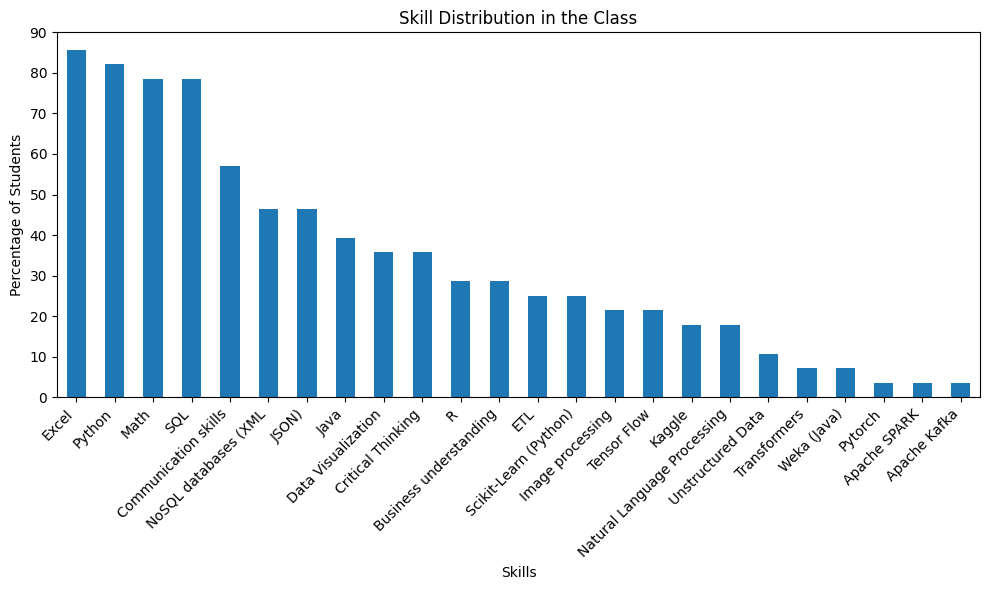

Class Average Proficiency: 33.63%

Student Proficiencies:
0: 33.33%
1: 41.67%
2: 37.50%
3: 45.83%
4: 54.17%
5: 62.50%
6: 29.17%
7: 29.17%
8: 62.50%
9: 25.00%
10: 33.33%
11: 54.17%
12: 41.67%
13: 25.00%
14: 58.33%
15: 8.33%
16: 20.83%
17: 16.67%
18: 25.00%
19: 29.17%
20: 25.00%
21: 12.50%
22: 37.50%
23: 25.00%
24: 29.17%
25: 25.00%
26: 20.83%
27: 33.33%


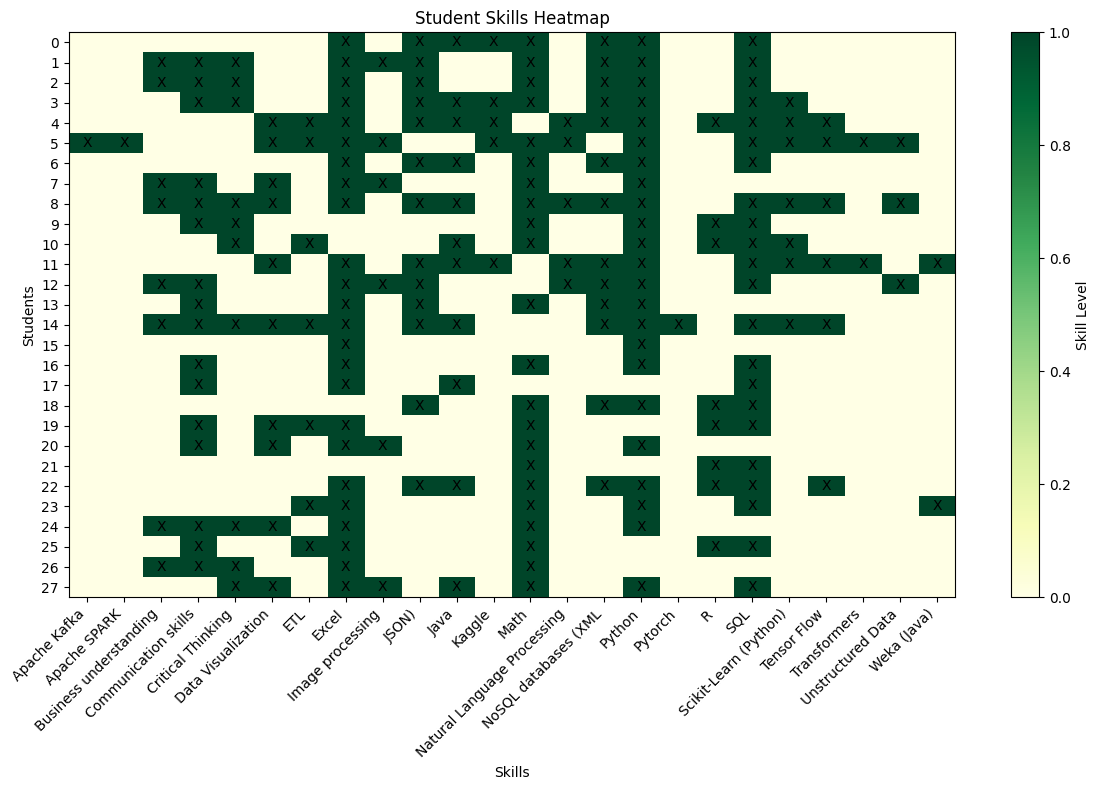


Competency Groups:
1 student(s) with 2 skill(s):


TypeError: sequence item 0: expected str instance, int found

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming we have a DataFrame named 'df' with students as rows and skills as columns
# Example:
# df = pd.DataFrame({
#     'Python': [True, False, True, True],
#     'SQL': [True, True, False, True],
#     'Machine Learning': [False, False, True, True],
#     'Data Visualization': [True, True, True, False]
# }, index=['Student A', 'Student B', 'Student C', 'Student D'])

# Approach 1: Skill Distribution and Overall Proficiency

def skill_distribution_and_proficiency(df):
    # Calculate the percentage of students who know each skill
    skill_distribution = df.mean().sort_values(ascending=False) * 100

    # Calculate the overall proficiency for each student
    student_proficiency = df.mean(axis=1) * 100

    # Calculate the class average proficiency
    class_average = student_proficiency.mean()

    # Visualize the skill distribution
    plt.figure(figsize=(10, 6))
    skill_distribution.plot(kind='bar')
    plt.title('Skill Distribution in the Class')
    plt.xlabel('Skills')
    plt.ylabel('Percentage of Students')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    # Print the class average proficiency
    print(f"Class Average Proficiency: {class_average:.2f}%")

    # Print individual student proficiencies
    print("\nStudent Proficiencies:")
    for student, proficiency in student_proficiency.items():
        print(f"{student}: {proficiency:.2f}%")

    return skill_distribution, student_proficiency, class_average

# Approach 2: Skill Heatmap and Competency Groups

def skill_heatmap_and_competency_groups(df):
    # Create a heatmap of skills
    plt.figure(figsize=(12, 8))
    plt.imshow(df, cmap='YlGn', aspect='auto')
    plt.title('Student Skills Heatmap')
    plt.xlabel('Skills')
    plt.ylabel('Students')
    plt.xticks(range(len(df.columns)), df.columns, rotation=45, ha='right')
    plt.yticks(range(len(df.index)), df.index)
    
    for i in range(len(df.index)):
        for j in range(len(df.columns)):
            plt.text(j, i, 'X' if df.iloc[i, j] else '', ha='center', va='center')
    
    plt.colorbar(label='Skill Level')
    plt.tight_layout()
    plt.show()

    # Group students by competency level
    competency_levels = df.sum(axis=1).value_counts().sort_index()
    
    print("\nCompetency Groups:")
    for level, count in competency_levels.items():
        print(f"{count} student(s) with {level} skill(s):")
        students = df[df.sum(axis=1) == level].index.tolist()
        print(", ".join(students))

    return competency_levels

# To use these functions:
skill_dist, student_prof, class_avg = skill_distribution_and_proficiency(boolean_skills_matrix)
competency_groups = skill_heatmap_and_competency_groups(boolean_skills_matrix)

**Prompt 2**: Error correction:
>There is an error at the end of the `skill_heatmap_and_competency_groups` method. At `print(", ".join(students))`; `sequence item 0: expected str instance, int found`

**Claude**: 
I apologize for the oversight. You're right, there's an error in the `skill_heatmap_and_competency_groups` function. The error occurs because the index of the DataFrame might be integers instead of strings. Let's fix this issue by converting the students to strings before joining them.

<mark>(code below)</mark>

I've updated the `skill_heatmap_and_competency_groups` function to fix the error you encountered. The change is in the last part of the function, where we print the students in each competency group. Here's the modified part:

```python
print("\nCompetency Groups:")
for level, count in competency_levels.items():
    print(f"{count} student(s) with {level} skill(s):")
    students = df[df.sum(axis=1) == level].index.tolist()
    # Convert students to strings before joining
    print(", ".join(map(str, students)))
```

The key change is the use of `map(str, students)` when joining the student names. This ensures that even if the DataFrame index consists of integers (or any other data type), they will be converted to strings before joining.

This modification makes the function more robust, as it will work correctly regardless of whether the DataFrame index consists of strings, integers, or any other data type that can be converted to a string.

The rest of the code remains the same. Both functions (`skill_distribution_and_proficiency` and `skill_heatmap_and_competency_groups`) should now work without any errors.

Is there anything else you'd like me to explain or modify in this code?

(code below)

I've updated the `skill_heatmap_and_competency_groups` function to fix the error you encountered. The change is in the last part of the function, where we print the students in each competency group. Here's the modified part:

```python
print("\nCompetency Groups:")
for level, count in competency_levels.items():
    print(f"{count} student(s) with {level} skill(s):")
    students = df[df.sum(axis=1) == level].index.tolist()
    # Convert students to strings before joining
    print(", ".join(map(str, students)))
```

The key change is the use of `map(str, students)` when joining the student names. This ensures that even if the DataFrame index consists of integers (or any other data type), they will be converted to strings before joining.

This modification makes the function more robust, as it will work correctly regardless of whether the DataFrame index consists of strings, integers, or any other data type that can be converted to a string.

The rest of the code remains the same. Both functions (`skill_distribution_and_proficiency` and `skill_heatmap_and_competency_groups`) should now work without any errors.

Is there anything else you'd like me to explain or modify in this code?

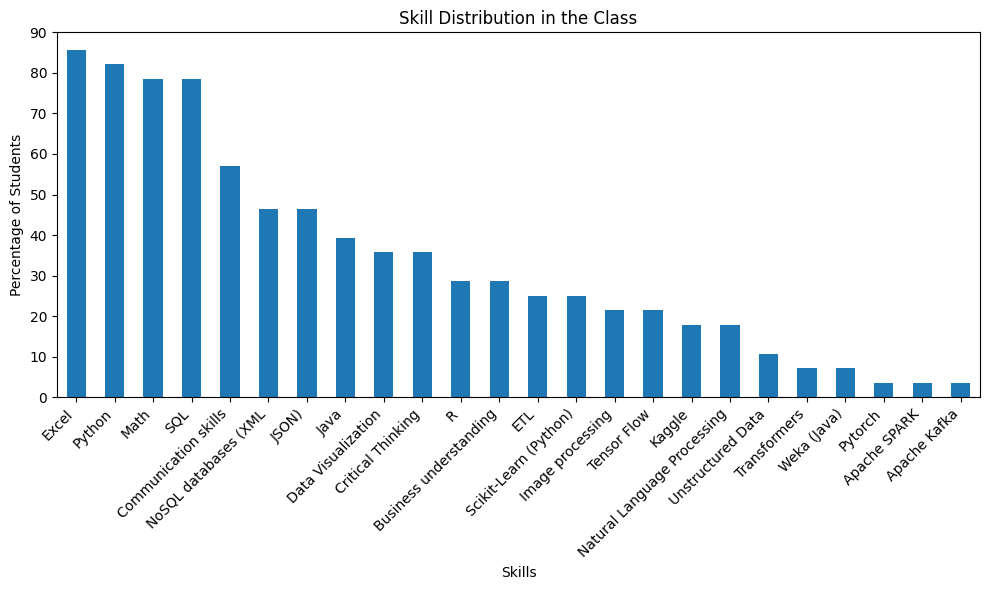

Class Average Proficiency: 33.63%

Student Proficiencies:
0: 33.33%
1: 41.67%
2: 37.50%
3: 45.83%
4: 54.17%
5: 62.50%
6: 29.17%
7: 29.17%
8: 62.50%
9: 25.00%
10: 33.33%
11: 54.17%
12: 41.67%
13: 25.00%
14: 58.33%
15: 8.33%
16: 20.83%
17: 16.67%
18: 25.00%
19: 29.17%
20: 25.00%
21: 12.50%
22: 37.50%
23: 25.00%
24: 29.17%
25: 25.00%
26: 20.83%
27: 33.33%


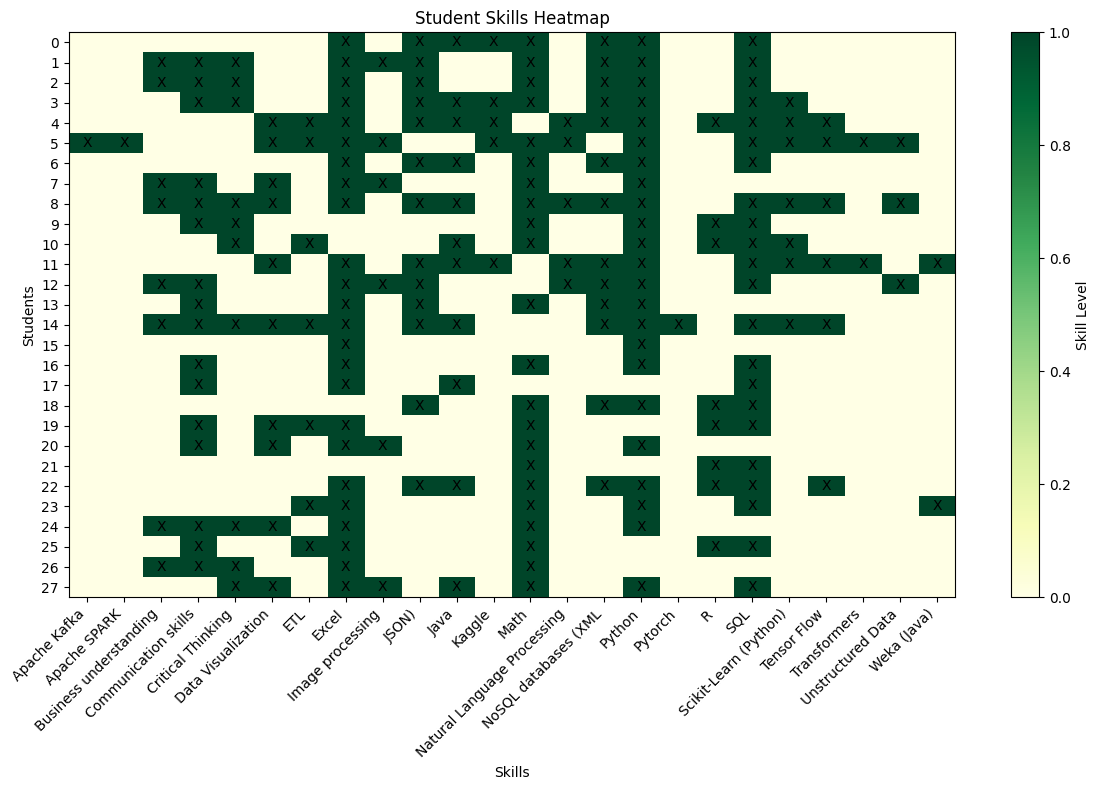


Competency Groups:
1 student(s) with 2 skill(s):
15
1 student(s) with 3 skill(s):
21
1 student(s) with 4 skill(s):
17
2 student(s) with 5 skill(s):
16, 26
6 student(s) with 6 skill(s):
9, 13, 18, 20, 23, 25
4 student(s) with 7 skill(s):
6, 7, 19, 24
3 student(s) with 8 skill(s):
0, 10, 27
2 student(s) with 9 skill(s):
2, 22
2 student(s) with 10 skill(s):
1, 12
1 student(s) with 11 skill(s):
3
2 student(s) with 13 skill(s):
4, 11
1 student(s) with 14 skill(s):
14
2 student(s) with 15 skill(s):
5, 8


In [47]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming we have a DataFrame named 'df' with students as rows and skills as columns
# Example:
# df = pd.DataFrame({
#     'Python': [True, False, True, True],
#     'SQL': [True, True, False, True],
#     'Machine Learning': [False, False, True, True],
#     'Data Visualization': [True, True, True, False]
# }, index=['Student A', 'Student B', 'Student C', 'Student D'])

# Approach 1: Skill Distribution and Overall Proficiency

def skill_distribution_and_proficiency(df):
    # Calculate the percentage of students who know each skill
    skill_distribution = df.mean().sort_values(ascending=False) * 100

    # Calculate the overall proficiency for each student
    student_proficiency = df.mean(axis=1) * 100

    # Calculate the class average proficiency
    class_average = student_proficiency.mean()

    # Visualize the skill distribution
    plt.figure(figsize=(10, 6))
    skill_distribution.plot(kind='bar')
    plt.title('Skill Distribution in the Class')
    plt.xlabel('Skills')
    plt.ylabel('Percentage of Students')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    # Print the class average proficiency
    print(f"Class Average Proficiency: {class_average:.2f}%")

    # Print individual student proficiencies
    print("\nStudent Proficiencies:")
    for student, proficiency in student_proficiency.items():
        print(f"{student}: {proficiency:.2f}%")

    return skill_distribution, student_proficiency, class_average

# Approach 2: Skill Heatmap and Competency Groups

def skill_heatmap_and_competency_groups(df):
    # Create a heatmap of skills
    plt.figure(figsize=(12, 8))
    plt.imshow(df, cmap='YlGn', aspect='auto')
    plt.title('Student Skills Heatmap')
    plt.xlabel('Skills')
    plt.ylabel('Students')
    plt.xticks(range(len(df.columns)), df.columns, rotation=45, ha='right')
    plt.yticks(range(len(df.index)), df.index)
    
    for i in range(len(df.index)):
        for j in range(len(df.columns)):
            plt.text(j, i, 'X' if df.iloc[i, j] else '', ha='center', va='center')
    
    plt.colorbar(label='Skill Level')
    plt.tight_layout()
    plt.show()

    # Group students by competency level
    competency_levels = df.sum(axis=1).value_counts().sort_index()
    
    print("\nCompetency Groups:")
    for level, count in competency_levels.items():
        print(f"{count} student(s) with {level} skill(s):")
        students = df[df.sum(axis=1) == level].index.tolist()
        # Convert students to strings before joining
        print(", ".join(map(str, students)))

    return competency_levels

# To use these functions:
skill_dist, student_prof, class_avg = skill_distribution_and_proficiency(boolean_skills_matrix)
competency_groups = skill_heatmap_and_competency_groups(boolean_skills_matrix)

#### Results

Although there was a minor error, Claude was much closer at getting an actual functional code for the problem, and it worked very well. 

Also, it seems that this way of structuring a problem is much easier and comes more naturally, and it allows asking for more and more additional problems down the road.

### Question 3: Schema -> Code -> Data -> Report

#### Details about the problem

For thi last prompting exercise, a problem from the third laboratory session has been selected; an exercice regarding MDX Queries:

The LLM will have to:
- Take the following mdx query prompt:

    ```sql
        WITH SET [Quarter1] AS
        'GENERATE([Time].[Year].MEMBERS, {[Time].CURRENTMEMBER.FIRSTCHILD})'
        SELECT [Quarter1] ON COLUMNS,
        [Store].[store_name].MEMBERS ON ROWS
        FROM [Sales] WHERE (Measures.[Profit])
    ```
- Explain its intention
- Generate code in python, using the `pivot table` from the Pandas module
- From a specified dataframe, passed as context, providing details about the expected resulting dataframe 

#### Prompting

**Prompt 1**: Question about the query

>Can you translate the following MDX query so I understand it? 
>
>WITH MEMBER Measures.Profit AS '(Measures.[Store Sales] - Measures.[Store Cost]) /(Measures.[Store Cost])' MEMBER [Time].[First Half 97] AS '[Time].[1997].[Q1] + [Time].[1997].[Q2]' MEMBER [Time].[Second Half 97] AS '[Time].[1997].[Q3] + [Time].[1997].[Q4]' SELECT {[Time].[First Half 97], [Time].[Second Half 97], [Time].[1997].CHILDREN} ON COLUMNS, {[Store].[store_name].MEMBERS} ON ROWS FROM [Sales]
>
>Also, make some general python code using the pandas module and the pivot table element that would fulfil that query

**Claude**: 
I'd be happy to translate the MDX query and provide a Python equivalent using pandas. Let's break it down step by step:



1. MDX Query Translation:The query is doing the following:
-  It defines a calculated measure called "Profit" as (Store Sales - Store Cost) / Store Cost.
- It creates two custom time periods: "First Half 97" (Q1 + Q2 of 1997) and "Second Half 97" (Q3 + Q4 of 1997).
- It selects these custom time periods along with the quarters of 1997 as columns.
- It selects all store_names as rows.
- It's querying from a cube named "Sales".

2. Python Equivalent using pandas:

Here's a Python script that mimics this MDX query using pandas:


In [5]:

import pandas as pd
import numpy as np

# Assume we have a DataFrame 'df' with columns: 'store_name', 'quarter', 'store_sales', 'store_cost'
# Let's create some sample data
np.random.seed(0)
stores = ['Store ' + str(i) for i in range(1, 11)]
quarters = ['1997 Q1', '1997 Q2', '1997 Q3', '1997 Q4']
data = []
for store in stores:
    for quarter in quarters:
        sales = np.random.randint(1000, 10000)
        cost = np.random.randint(500, sales)
        data.append([store, quarter, sales, cost])

df = pd.DataFrame(data, columns=['store_name', 'Quarter', 'store_sales', 'store_cost'])

# Calculate Profit
df['Profit'] = (df['store_sales'] - df['store_cost']) / df['store_cost']

# Create a mapping for custom time periods
time_mapping = {
    '1997 Q1': 'First Half 97',
    '1997 Q2': 'First Half 97',
    '1997 Q3': 'Second Half 97',
    '1997 Q4': 'Second Half 97'
}

df['Custom Period'] = df['Quarter'].map(time_mapping)
print(df['Custom Period'])
# Create pivot table
pivot = pd.pivot_table(df, 
                       values='Profit', 
                       index='store_name', 
                       columns=['Custom Period', 'Quarter'],
                       aggfunc='sum')

# Reorder columns to match MDX query
column_order = [('First Half 97', ''), ('Second Half 97', ''), 
                ('', '1997 Q1'), ('', '1997 Q2'), ('', '1997 Q3'), ('', '1997 Q4')]
pivot = pivot.reindex(columns=column_order, level=[0,1])

print(pivot)


KeyError: 'Level [0, 1] not found'


This Python code does the following:

1. Creates a sample DataFrame that mimics the structure of the data in the MDX cube.
2. Calculates the Profit measure as defined in the MDX query.
3. Creates custom time periods (First Half 97 and Second Half 97) using a mapping.
4. Uses pandas' pivot_table function to create a structure similar to the MDX query result.
5. Reorders the columns to match the MDX query's output order.

The resulting pivot table will have stores as rows and the custom time periods and quarters as columns, with profit values in the cells.

Would you like me to explain any part of this code in more detail?

**Prompt 2**: Giving the data
>okay, now that you solved the problem, make the necessary modifications in that code so i can load my xlsx containing that data and test it. The xlsx contains economic information about FoodMart

**Claude**:

Certainly, I'll modify the code to load data from an Excel file containing FoodMart economic information. We'll assume the structure of your Excel file is similar to the sample data we created earlier, but we'll make the code flexible enough to handle potential differences.

In [7]:
import pandas as pd
import numpy as np

# Load the Excel file
file_path = '.res/CUBE_SALES.xlsx'  # Replace with your actual file path
sheet_name = 0  # Replace with your actual sheet name

try:
    df = pd.read_excel(file_path, sheet_name=sheet_name)
    print("Data loaded successfully. Shape:", df.shape)
    print("\nColumn names:")
    print(df.columns)
except FileNotFoundError:
    print(f"Error: File '{file_path}' not found.")
    exit()
except Exception as e:
    print(f"An error occurred while reading the file: {str(e)}")
    exit()

print(df.columns)
exit(1)

# Check if required columns exist
required_columns = ['store_name', 'Quarter', 'store_sales', 'store_cost']
missing_columns = [col for col in required_columns if col not in df.columns]

if missing_columns:
    print(f"Error: The following required columns are missing: {missing_columns}")
    print("Please ensure your Excel file contains these columns.")
    exit()

# Calculate Profit
df['Profit'] = (df['store_sales'] - df['store_cost']) / df['store_cost']

# Create a mapping for custom time periods
# Adjust this mapping if your quarter format is different
time_mapping = {
    'Q1 1997': 'First Half 97',
    'Q2 1997': 'First Half 97',
    'Q3 1997': 'Second Half 97',
    'Q4 1997': 'Second Half 97'
}

# Check if 'quarter' column values match our expected format
sample_quarters = df['Quarter'].unique()
print("\nSample quarter values:")
print(sample_quarters)

if not any(q in time_mapping for q in sample_quarters):
    print("Warning: quarter format doesn't match expected. Please adjust the time_mapping dictionary.")
    # You might want to add code here to automatically generate the mapping based on the data

df['Custom Period'] = df['Quarter'].map(time_mapping)

# Create pivot table
pivot = pd.pivot_table(df, 
                       values='Profit', 
                       index='store_name', 
                       columns=['Custom Period', 'Quarter'],
                       aggfunc='sum')

# Reorder columns to match MDX query
column_order = [('First Half 97', ''), ('Second Half 97', ''), 
                ('', 'Q1 1997'), ('', 'Q2 1997'), ('', 'Q3 1997'), ('', 'Q4 1997')]
pivot = pivot.reindex(columns=column_order, level=[0,1])

print("\nPivot Table:")
print(pivot)

# Optional: Save the result to a new Excel file
output_file = 'FoodMart_Analysis_Result.xlsx'
pivot.to_excel(output_file)
print(f"\nResults saved to {output_file}")

Data loaded successfully. Shape: (70751, 26)

Column names:
Index(['store_sales', 'store_cost', 'unit_sales', 'store_type', 'store_name',
       'store_city', 'store_state', 'store_country', 'store_sqft', 'the_year',
       'the_month', 'Quarter', 'promotion_name', 'media_type', 'brand_name',
       'product_name', 'subcategory', 'category', 'family', 'city',
       'state_province', 'country', 'marital_status', 'yearly_income',
       'gender', 'fullname'],
      dtype='object')
Index(['store_sales', 'store_cost', 'unit_sales', 'store_type', 'store_name',
       'store_city', 'store_state', 'store_country', 'store_sqft', 'the_year',
       'the_month', 'Quarter', 'promotion_name', 'media_type', 'brand_name',
       'product_name', 'subcategory', 'category', 'family', 'city',
       'state_province', 'country', 'marital_status', 'yearly_income',
       'gender', 'fullname'],
      dtype='object')

Sample quarter values:
['Q1' 'Q2' 'Q3' 'Q4']


KeyError: 'Level [0, 1] not found'

Here are the key modifications and considerations in this updated code:

1. File Loading:
   - Replace 'path_to_your_file.xlsx' with the actual path to your Excel file.
   - Adjust 'Sheet1' to the name of the sheet containing your data.

2. Error Handling:
   - The code now includes error handling for file not found and other potential issues during file reading.

3. Column Verification:
   - It checks if the required columns ('store_name', 'Quarter', 'Store Sales', 'Store Cost') exist in your Excel file.

4. Quarter Format:
   - The code prints out sample quarter values from your data.
   - You may need to adjust the `time_mapping` dictionary if your quarter format is different from what's assumed (e.g., 'Q1 1997' instead of '1997 Q1').

5. Pivot Table Creation:
   - This remains largely the same but now uses your actual data.

6. Result Saving:
   - The result is saved to a new Excel file named 'FoodMart_Analysis_Result.xlsx'.

To use this code:

1. Ensure you have pandas installed (`pip install pandas openpyxl`).
2. Replace 'path_to_your_file.xlsx' with the actual path to your Excel file.
3. Run the script.

The script will print out information about the loaded data, including its shape and column names. This will help you verify if the data is loaded correctly and if any adjustments are needed.

If you encounter any issues or if the quarter format in your Excel file is different from what's assumed, you may need to make minor adjustments to the code, particularly in the `time_mapping` dictionary.

Would you like me to explain any part of this code further or help with any specific adjustments?

> Had to modify column names and sheet tab name

For this sturcture, and this problem, claude has not been able to help.